In [151]:
import pandas as pd
import numpy as np
import re

In [152]:
data = pd.read_csv("Aries.csv")

In [153]:
data.head()
df = data.copy()
df['Review'].describe()

count       99
unique      95
top       good
freq         5
Name: Review, dtype: object

In [154]:
def clean_txt(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result1 = re.sub("[^\w\s]","",result)
    tokens = word_tokenize(sent.lower())
    text = [term for term in tokens if len(term) > 2] 
    res = " ".join(text)
    return res

In [155]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [156]:
df['Review'] = df['Review'].astype('str') 
df['Review'] = df.Review.apply(clean_txt)

In [157]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Sentiment calculation using SentimentIntensityAnalyzer

In [158]:
df

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Review,neg,neu,pos,compound,Polarity
0,0,0,0,0,0,0,0,0,0,0,0,good but need updates and improvements,0.000,0.449,0.551,0.5994,0.5994
1,1,1,1,1,1,1,1,1,1,1,1,worst mobile have bought ever battery draining...,0.152,0.779,0.070,-0.8720,-0.8720
2,2,2,2,2,2,2,2,2,2,2,2,when will get cash back .... its already january,0.000,1.000,0.000,0.0000,0.0000
3,3,3,3,3,3,3,3,3,3,3,3,good,0.000,0.000,1.000,0.4404,0.4404
4,4,4,4,4,4,4,4,4,4,4,4,the worst phone everthey have changed the last...,0.293,0.596,0.111,-0.8289,-0.8289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,94,94,94,94,94,94,94,94,94,94,you are looking for mid range phone can for th...,0.172,0.660,0.169,-0.2732,-0.2732
95,95,95,95,95,95,95,95,95,95,95,95,sim slot was not working returned and got fast...,0.132,0.686,0.182,0.1426,0.1426
96,96,96,96,96,96,96,96,96,96,96,96,worst for gaming and music bought this for the...,0.136,0.815,0.049,-0.7814,-0.7814
97,97,97,97,97,97,97,97,97,97,97,97,really awsome,0.000,1.000,0.000,0.0000,0.0000


In [159]:
df.to_csv("Aries.csv")
reviews_combined = " ".join(df.Review)

In [160]:
import re
reviews_combined = re.sub(r"[^\w\s]+"," ",reviews_combined)

In [161]:
from wordcloud import WordCloud
word_cloud = WordCloud().generate_from_text(reviews_combined)

In [162]:
from matplotlib import pyplot as plt

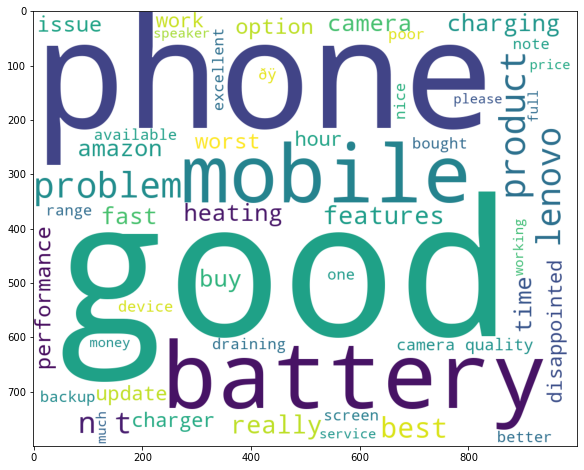

In [163]:
word_cloud = WordCloud(width=1000,height=800,background_color='white',max_words = 50,random_state = 500).\
generate_from_text(reviews_combined)
plt.figure(figsize=[10,8])
plt.imshow(word_cloud)
plt.show()

In [164]:
all_terms = word_tokenize(reviews_combined.lower())
stop_nltk = stopwords.words("english")
stop_nltk.remove('not')
all_terms

['good',
 'but',
 'need',
 'updates',
 'and',
 'improvements',
 'worst',
 'mobile',
 'have',
 'bought',
 'ever',
 'battery',
 'draining',
 'like',
 'hell',
 'backup',
 'only',
 'hours',
 'with',
 'internet',
 'uses',
 'even',
 'put',
 'mobile',
 'idle',
 'its',
 'getting',
 'discharged',
 'this',
 'biggest',
 'lie',
 'from',
 'amazon',
 'lenove',
 'which',
 'not',
 'all',
 'expected',
 'they',
 'are',
 'making',
 'full',
 'saying',
 'that',
 'battery',
 '4000mah',
 'booster',
 'charger',
 'fake',
 'takes',
 'least',
 'hours',
 'fully',
 'charged',
 'do',
 'n',
 't',
 'know',
 'how',
 'lenovo',
 'will',
 'survive',
 'making',
 'full',
 'us',
 'please',
 'don',
 'for',
 'this',
 'else',
 'you',
 'will',
 'regret',
 'like',
 'when',
 'will',
 'get',
 'cash',
 'back',
 'its',
 'already',
 'january',
 'good',
 'the',
 'worst',
 'phone',
 'everthey',
 'have',
 'changed',
 'the',
 'last',
 'phone',
 'but',
 'the',
 'problem',
 'still',
 'same',
 'and',
 'the',
 'amazon',
 'not',
 'returning',

In [165]:
reviews_updated = [word for word in all_terms if word not in stop_nltk and len(word) >= 2]

In [166]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [167]:
reviews_updated_stem = [ stemmer_s.stem(word) for word in reviews_updated]

In [168]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [169]:
reviews_updated_lemm = [ lemm.lemmatize(word,pos='v') for word in reviews_updated]

In [170]:
from nltk.corpus import wordnet
def clean_txtstem(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens if term not in stop_nltk and len(term) > 1] 
    res = " ".join(stemmed)
    return res
def clean_txtlemma(sent):
    sent = re.sub(r"[^\w\s]+"," ",sent)
    tokens = word_tokenize(sent.lower())
    lemmatized = [lemm.lemmatize(term, pos = 'v') for term in tokens if term not in stop_nltk and len(term) > 1] 
    res = " ".join(lemmatized)
    res = re.sub("n't","not",res)#replacing n't with not
    words = word_tokenize(res)
    new_words = []
    temp_word = ''
    for word in words:
        antonyms = []
        if word == 'not':
            temp_word = 'not '
        elif temp_word == 'not ':
            for syn in wordnet.synsets(word):
                for s in syn.lemmas():
                    for a in s.antonyms():
                        antonyms.append(a.name())#replacing word following not with its antonymn
            if len(antonyms) >= 1:
                word = antonyms[0]
            else:
                word = temp_word + word
            temp_word = ''
        if word != 'not':
            new_words.append(word)

    res = ' '.join(new_words)
    return res

In [171]:
df['clean_reviewstem'] = df.Review.apply(clean_txtstem)

In [172]:
df['clean_reviewlemm'] = df.Review.apply(clean_txtlemma)
df.head()

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Review,neg,neu,pos,compound,Polarity,clean_reviewstem,clean_reviewlemm
0,0,0,0,0,0,0,0,0,0,0,0,good but need updates and improvements,0.000,0.449,0.551,0.5994,0.5994,good need updat improv,good need update improvements
1,1,1,1,1,1,1,1,1,1,1,1,worst mobile have bought ever battery draining...,0.152,0.779,0.070,-0.8720,-0.8720,worst mobil bought ever batteri drain like hel...,worst mobile buy ever battery drain like hell ...
2,2,2,2,2,2,2,2,2,2,2,2,when will get cash back .... its already january,0.000,1.000,0.000,0.0000,0.0000,get cash back .... alreadi januari,get cash back already january
3,3,3,3,3,3,3,3,3,3,3,3,good,0.000,0.000,1.000,0.4404,0.4404,good,good
4,4,4,4,4,4,4,4,4,4,4,4,the worst phone everthey have changed the last...,0.293,0.596,0.111,-0.8289,-0.8289,worst phone everthey chang last phone problem ...,worst phone everthey change last phone problem...


In [173]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
neg = []
neu = []
pos = []
compound = []
for i in df.clean_reviewlemm:
#     print(analyser.polarity_scores(i))
    neg.append(analyser.polarity_scores(i)['neg'])
    neu.append(analyser.polarity_scores(i)['neu'])
    pos.append(analyser.polarity_scores(i)['pos'])
    compound.append(analyser.polarity_scores(i)['compound'])
df['Score'] = compound

In [174]:
df['sent_prediction_vader'] = df.compound.\
apply(lambda x:1 if x>0.1 else 0)
df['sent_prediction_vader'] 

0     1
1     0
2     0
3     1
4     0
     ..
94    0
95    1
96    0
97    0
98    0
Name: sent_prediction_vader, Length: 99, dtype: int64

In [175]:
X = df.clean_reviewlemm.values
y = df.sent_prediction_vader.values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=1)

In [176]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100)

In [177]:
X_train_bow = vectorizer.fit_transform(X_train)

In [178]:
X_test_bow = vectorizer.transform(X_test)

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
logreg = LogisticRegression()

In [181]:
logreg.fit(X_train_bow,y_train)

LogisticRegression()

In [182]:
y_test_pred = logreg.predict(X_test_bow)

In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_test_pred)

0.55

In [184]:
confusion_matrix(y_test, y_test_pred)

array([[5, 6],
       [3, 6]], dtype=int64)

In [185]:
y_train_pred = logreg.predict(X_train_bow)
accuracy_score(y_train, y_train_pred)

0.9620253164556962

### Sentiment classification using tfidfvectorizer

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1500)

In [187]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=1)

In [188]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [189]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegression())
    ])

# fit on the pipeline 
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.58      0.78      0.67         9

    accuracy                           0.65        20
   macro avg       0.67      0.66      0.65        20
weighted avg       0.68      0.65      0.65        20



In [190]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 2))),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier())
    ])

# fit on the pipeline 
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.50      0.89      0.64         9

    accuracy                           0.55        20
   macro avg       0.62      0.58      0.52        20
weighted avg       0.64      0.55      0.51        20



In [191]:
from sklearn.svm import SVC

In [192]:
pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(kernel='rbf', random_state = 4520))
    ])


# fit on the pipeline 
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# import the class report function for benchmark model evaluation. 
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.54      0.78      0.64         9

    accuracy                           0.60        20
   macro avg       0.63      0.62      0.60        20
weighted avg       0.64      0.60      0.59        20



In [193]:
import joblib
pipeline_file = open('aries_code.pkl','wb')
joblib.dump(pipeline,pipeline_file)
pipeline_file.close()

In [194]:
import pickle
filename = 'trained_model.sav'
pickle.dump(pipeline,open(filename,'wb'))

In [195]:
'''
import json
f = open('feedbacks.json')
data = json.load(f)
feedbacks = data["feedbacks"]
fd = pd.DataFrame(feedbacks).set_index('id')
'''

'\nimport json\nf = open(\'feedbacks.json\')\ndata = json.load(f)\nfeedbacks = data["feedbacks"]\nfd = pd.DataFrame(feedbacks).set_index(\'id\')\n'

In [196]:
url = "http://octopus:8000/api/feedback"

In [197]:
import requests

In [198]:
#for feedback in feedbacks:
    # requests.post(url, feedback)

In [205]:
def load_feedback():
    feedbacks = requests.get(url)
    return pd.DataFrame(feedbacks.json()).set_index('id')

In [206]:
fd = load_feedback()
fd

,visitorName,speech,date,projectId
id,,,,
35,SHRASHTIKA,Good but need updates and improvements,2022-05-07,1
36,TANISHA,A lot of glitches dont buy this thing better g...,2022-05-07,2
37,ZOAYA,It ok good product,2022-05-07,2
38,SUHANI,Verigood Verigood.best,2022-05-07,5
39,SEJAL,Really killer,2022-05-07,3
40,ADITI,I personally don't recommend to buy this produ...,2022-05-07,1
41,SHRASHTIKA,Product is good.,2022-05-07,1
42,TANISHA,Amazing product in reasonable price range.,2022-05-07,4
43,ZOAYA,Not a good product...,2022-05-07,2


In [201]:
fd['speech'] = fd['speech'].astype('str') 
fd['speech'] = fd.speech.apply(clean_txt)
reviews = fd['speech']
fd['clean_reviewstem'] = reviews.apply(clean_txtstem)
fd['clean_reviewlemm'] = reviews.apply(clean_txtlemma)

compound = []
fd['Sentiment'] = pipe1.predict(reviews)
for i in reviews:
    compound.append(analyser.polarity_scores(i)['compound'])
fd['Score'] = compound

In [202]:
fd.drop(columns=['clean_reviewstem','clean_reviewlemm'])
fd.to_csv("Prediction_data.csv")

In [203]:
result = fd.groupby(by="projectId").sum()
result

,Sentiment,Score
projectId,,
1,5,1.2062
2,6,0.7106
3,1,-0.6159
4,4,1.6995
5,2,-0.1411


In [204]:
result.sort_values(by=['Score'],ascending=0)

,Sentiment,Score
projectId,,
4,4,1.6995
1,5,1.2062
2,6,0.7106
5,2,-0.1411
3,1,-0.6159
